# Notes

This notebook creates paper-worthy plots and tables based on the outcome of the best fits for each type of large-scale structure, as determined by Paper_Plots_Fitting_2.ipynb.

It uses some of the plotting developed in Paper_Plots_fitting_1.ipynb

The best way to fit the void portion is a lognormal using scipy
The best way to fit the filament portion is also a lognormal using scipy
The best way to fit the halo portion is a fisk using scipy, but only drawing positive values.

# Imports

In [1]:
import numpy as np
from scipy import stats
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from astropy.modeling import models, fitting
from astropy.modeling.models import custom_model
from scipy.stats import gumbel_l, lognorm,gilbrat,fisk
from scipy.signal import convolve
from scipy.integrate import simps
from scipy.stats import ks_2samp
from scipy.stats import rv_continuous 
from scipy.interpolate import interp1d
from scipy.integrate import cumtrapz
import matplotlib as mpl


# Begin

## Load data to be fitted

In [2]:
#simulation to load data which will be fitted for
sim_to_load = 'TNG300-1'

In [3]:
#load the normalised histograms of the data to check fits against
Tot_DM_norm = np.load('Paper_DM-z_Hists_TotCounts_{0}.npy'.format(sim_to_load))
Hal_DM_norm = np.load('Paper_DM-z_Hists_HalCounts_{0}.npy'.format(sim_to_load))
Fil_DM_norm = np.load('Paper_DM-z_Hists_FilCounts_{0}.npy'.format(sim_to_load))
Voi_DM_norm = np.load('Paper_DM-z_Hists_VoiCounts_{0}.npy'.format(sim_to_load))

#the redshifts the histograms were made for
snap_z_list = np.load('Paper_DM-z_Hists_Redshifts_{0}.npy'.format(sim_to_load))
print('number of snapshots: {0}'.format(len(snap_z_list)))

#the bin edges that the histograms were made for
bin_edges = np.load('Paper_DM-z_Hists_BinEdges_{0}.npy'.format(sim_to_load))
print('number of bin edges: {0}'.format(len(bin_edges)))

print('Data loaded.')
print('Data shape: {0}. Number of histograms: {1}'.format(Tot_DM_norm.shape,Tot_DM_norm.shape[0]))

number of snapshots: 13
number of bin edges: 1000
Data loaded.
Data shape: (13, 999). Number of histograms: 13


In [4]:
#also load the original data that was histogrammed for fitting
DMs_Tot_99 = np.load('./Stored_Pipe_DM_Values/Tot_DMs_sim_{0}_snap_99.npy'.format(sim_to_load))
DMs_Hal_99 = np.load('./Stored_Pipe_DM_Values/Hal_DMs_sim_{0}_snap_99.npy'.format(sim_to_load))
DMs_Fil_99 = np.load('./Stored_Pipe_DM_Values/Fil_DMs_sim_{0}_snap_99.npy'.format(sim_to_load))
DMs_Voi_99 = np.load('./Stored_Pipe_DM_Values/Voi_DMs_sim_{0}_snap_99.npy'.format(sim_to_load))

DMs_Tot_91 = np.load('./Stored_Pipe_DM_Values/Tot_DMs_sim_{0}_snap_91.npy'.format(sim_to_load))
DMs_Hal_91 = np.load('./Stored_Pipe_DM_Values/Hal_DMs_sim_{0}_snap_91.npy'.format(sim_to_load))
DMs_Fil_91 = np.load('./Stored_Pipe_DM_Values/Fil_DMs_sim_{0}_snap_91.npy'.format(sim_to_load))
DMs_Voi_91 = np.load('./Stored_Pipe_DM_Values/Voi_DMs_sim_{0}_snap_91.npy'.format(sim_to_load))

DMs_Tot_84 = np.load('./Stored_Pipe_DM_Values/Tot_DMs_sim_{0}_snap_84.npy'.format(sim_to_load))
DMs_Hal_84 = np.load('./Stored_Pipe_DM_Values/Hal_DMs_sim_{0}_snap_84.npy'.format(sim_to_load))
DMs_Fil_84 = np.load('./Stored_Pipe_DM_Values/Fil_DMs_sim_{0}_snap_84.npy'.format(sim_to_load))
DMs_Voi_84 = np.load('./Stored_Pipe_DM_Values/Voi_DMs_sim_{0}_snap_84.npy'.format(sim_to_load))

DMs_Tot_78 = np.load('./Stored_Pipe_DM_Values/Tot_DMs_sim_{0}_snap_78.npy'.format(sim_to_load))
DMs_Hal_78 = np.load('./Stored_Pipe_DM_Values/Hal_DMs_sim_{0}_snap_78.npy'.format(sim_to_load))
DMs_Fil_78 = np.load('./Stored_Pipe_DM_Values/Fil_DMs_sim_{0}_snap_78.npy'.format(sim_to_load))
DMs_Voi_78 = np.load('./Stored_Pipe_DM_Values/Voi_DMs_sim_{0}_snap_78.npy'.format(sim_to_load))

DMs_Tot_72 = np.load('./Stored_Pipe_DM_Values/Tot_DMs_sim_{0}_snap_72.npy'.format(sim_to_load))
DMs_Hal_72 = np.load('./Stored_Pipe_DM_Values/Hal_DMs_sim_{0}_snap_72.npy'.format(sim_to_load))
DMs_Fil_72 = np.load('./Stored_Pipe_DM_Values/Fil_DMs_sim_{0}_snap_72.npy'.format(sim_to_load))
DMs_Voi_72 = np.load('./Stored_Pipe_DM_Values/Voi_DMs_sim_{0}_snap_72.npy'.format(sim_to_load))

DMs_Tot_67 = np.load('./Stored_Pipe_DM_Values/Tot_DMs_sim_{0}_snap_67.npy'.format(sim_to_load))
DMs_Hal_67 = np.load('./Stored_Pipe_DM_Values/Hal_DMs_sim_{0}_snap_67.npy'.format(sim_to_load))
DMs_Fil_67 = np.load('./Stored_Pipe_DM_Values/Fil_DMs_sim_{0}_snap_67.npy'.format(sim_to_load))
DMs_Voi_67 = np.load('./Stored_Pipe_DM_Values/Voi_DMs_sim_{0}_snap_67.npy'.format(sim_to_load))

DMs_Tot_59 = np.load('./Stored_Pipe_DM_Values/Tot_DMs_sim_{0}_snap_59.npy'.format(sim_to_load))
DMs_Hal_59 = np.load('./Stored_Pipe_DM_Values/Hal_DMs_sim_{0}_snap_59.npy'.format(sim_to_load))
DMs_Fil_59 = np.load('./Stored_Pipe_DM_Values/Fil_DMs_sim_{0}_snap_59.npy'.format(sim_to_load))
DMs_Voi_59 = np.load('./Stored_Pipe_DM_Values/Voi_DMs_sim_{0}_snap_59.npy'.format(sim_to_load))

DMs_Tot_50 = np.load('./Stored_Pipe_DM_Values/Tot_DMs_sim_{0}_snap_50.npy'.format(sim_to_load))
DMs_Hal_50 = np.load('./Stored_Pipe_DM_Values/Hal_DMs_sim_{0}_snap_50.npy'.format(sim_to_load))
DMs_Fil_50 = np.load('./Stored_Pipe_DM_Values/Fil_DMs_sim_{0}_snap_50.npy'.format(sim_to_load))
DMs_Voi_50 = np.load('./Stored_Pipe_DM_Values/Voi_DMs_sim_{0}_snap_50.npy'.format(sim_to_load))

DMs_Tot_40 = np.load('./Stored_Pipe_DM_Values/Tot_DMs_sim_{0}_snap_40.npy'.format(sim_to_load))
DMs_Hal_40 = np.load('./Stored_Pipe_DM_Values/Hal_DMs_sim_{0}_snap_40.npy'.format(sim_to_load))
DMs_Fil_40 = np.load('./Stored_Pipe_DM_Values/Fil_DMs_sim_{0}_snap_40.npy'.format(sim_to_load))
DMs_Voi_40 = np.load('./Stored_Pipe_DM_Values/Voi_DMs_sim_{0}_snap_40.npy'.format(sim_to_load))

DMs_Tot_33 = np.load('./Stored_Pipe_DM_Values/Tot_DMs_sim_{0}_snap_33.npy'.format(sim_to_load))
DMs_Hal_33 = np.load('./Stored_Pipe_DM_Values/Hal_DMs_sim_{0}_snap_33.npy'.format(sim_to_load))
DMs_Fil_33 = np.load('./Stored_Pipe_DM_Values/Fil_DMs_sim_{0}_snap_33.npy'.format(sim_to_load))
DMs_Voi_33 = np.load('./Stored_Pipe_DM_Values/Voi_DMs_sim_{0}_snap_33.npy'.format(sim_to_load))

DMs_Tot_25 = np.load('./Stored_Pipe_DM_Values/Tot_DMs_sim_{0}_snap_25.npy'.format(sim_to_load))
DMs_Hal_25 = np.load('./Stored_Pipe_DM_Values/Hal_DMs_sim_{0}_snap_25.npy'.format(sim_to_load))
DMs_Fil_25 = np.load('./Stored_Pipe_DM_Values/Fil_DMs_sim_{0}_snap_25.npy'.format(sim_to_load))
DMs_Voi_25 = np.load('./Stored_Pipe_DM_Values/Voi_DMs_sim_{0}_snap_25.npy'.format(sim_to_load))

DMs_Tot_21 = np.load('./Stored_Pipe_DM_Values/Tot_DMs_sim_{0}_snap_21.npy'.format(sim_to_load))
DMs_Hal_21 = np.load('./Stored_Pipe_DM_Values/Hal_DMs_sim_{0}_snap_21.npy'.format(sim_to_load))
DMs_Fil_21 = np.load('./Stored_Pipe_DM_Values/Fil_DMs_sim_{0}_snap_21.npy'.format(sim_to_load))
DMs_Voi_21 = np.load('./Stored_Pipe_DM_Values/Voi_DMs_sim_{0}_snap_21.npy'.format(sim_to_load))

DMs_Tot_17 = np.load('./Stored_Pipe_DM_Values/Tot_DMs_sim_{0}_snap_17.npy'.format(sim_to_load))
DMs_Hal_17 = np.load('./Stored_Pipe_DM_Values/Hal_DMs_sim_{0}_snap_17.npy'.format(sim_to_load))
DMs_Fil_17 = np.load('./Stored_Pipe_DM_Values/Fil_DMs_sim_{0}_snap_17.npy'.format(sim_to_load))
DMs_Voi_17 = np.load('./Stored_Pipe_DM_Values/Voi_DMs_sim_{0}_snap_17.npy'.format(sim_to_load))

In [5]:
#put data into handy array form
Tot_data = [DMs_Tot_99,
            DMs_Tot_91,
            DMs_Tot_84,
            DMs_Tot_78,
            DMs_Tot_72,
            DMs_Tot_67,
            DMs_Tot_59,
            DMs_Tot_50,
            DMs_Tot_40,
            DMs_Tot_33,
            DMs_Tot_25,
            DMs_Tot_21,
            DMs_Tot_17]

Hal_data = [DMs_Hal_99,
            DMs_Hal_91,
            DMs_Hal_84,
            DMs_Hal_78,
            DMs_Hal_72,
            DMs_Hal_67,
            DMs_Hal_59,
            DMs_Hal_50,
            DMs_Hal_40,
            DMs_Hal_33,
            DMs_Hal_25,
            DMs_Hal_21,
            DMs_Hal_17]

Fil_data = [DMs_Fil_99,
            DMs_Fil_91,
            DMs_Fil_84,
            DMs_Fil_78,
            DMs_Fil_72,
            DMs_Fil_67,
            DMs_Fil_59,
            DMs_Fil_50,
            DMs_Fil_40,
            DMs_Fil_33,
            DMs_Fil_25,
            DMs_Fil_21,
            DMs_Fil_17]

Voi_data = [DMs_Voi_99,
            DMs_Voi_91,
            DMs_Voi_84,
            DMs_Voi_78,
            DMs_Voi_72,
            DMs_Voi_67,
            DMs_Voi_59,
            DMs_Voi_50,
            DMs_Voi_40,
            DMs_Voi_33,
            DMs_Voi_25,
            DMs_Voi_21,
            DMs_Voi_17]

## Also histogram the log of the halo data (as this is what will be fit in the halo case)

In [6]:
#initialise arrays to hold histogram outputs
Hal_DM_norm_new_counts = [] 
Hal_DM_norm_new_bins = []

bin_edges_new = np.logspace(0,4,num=1000) #bin edges for histogramming

#loop over snapshots
for data in [DMs_Hal_99,
          DMs_Hal_91,
          DMs_Hal_84,
          DMs_Hal_78,
          DMs_Hal_72,
          DMs_Hal_67,
          DMs_Hal_59,
          DMs_Hal_50,
          DMs_Hal_40,
          DMs_Hal_33,
          DMs_Hal_25,
          DMs_Hal_21,
          DMs_Hal_17]:
    
    #log the data
    data=np.log(data)
    #get rid of negative values (which go nan when you log)
    tokeep = np.invert(np.isnan(np.log(data)))
    data = data[tokeep]
    
    #histogram
    counts,bins = np.histogram(data,bin_edges_new,density=True)
    #append to results arrays
    Hal_DM_norm_new_counts.append(counts)
    Hal_DM_norm_new_bins.append(bins)

/raven/u/cwalker/virtual_environments/yt-env/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
/raven/u/cwalker/virtual_environments/yt-env/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


## Perform the fitting

### Filament fits

In [15]:
#do the fitting

######################
#Fit filament portion#
######################

#define data to fit
data_to_fit = [DMs_Fil_91,
               DMs_Fil_84,
               DMs_Fil_78,
               DMs_Fil_72,
               DMs_Fil_67,
               DMs_Fil_59,
               DMs_Fil_50,
               DMs_Fil_40,
               DMs_Fil_33,
               DMs_Fil_25,
               DMs_Fil_21,
               DMs_Fil_17] #the data which will be fitted

#initialise parameters which go into fits
#Note: Filaments will be fit with a lognormal
#which uses shape, loc, scale

Fil_shapes = [] #shape parameter
Fil_locs = [] #location parameter
Fil_scales = [] #scale parameter

#loop over data, obtain parameters
for i in range(len(data_to_fit)):
    
    #select data to fit
    data=data_to_fit[i][::10] #for speed, only fit to a subsection. can do full dataset in final product.
    
    #fit data
    shape,loc,scale = lognorm.fit(data)
    
    #append to arrays
    Fil_shapes.append(shape)
    Fil_locs.append(loc)
    Fil_scales.append(scale)
    print(shape,loc,scale)

0.5122960878453287 11.764909502103748 47.38107230693287
0.4585879942866359 29.335937227397736 94.33083703316245
0.40027686563662046 47.93589542135615 146.42713108380215
0.3572873117809394 69.50344911017606 199.67505647369887
0.3230337278328469 91.92433883950736 255.20935103620377
0.2899507625851893 133.97994445855306 364.0253894404093
0.28362125500965474 225.7529783096603 498.54741987770774
0.26246034874725266 362.4400891740197 736.7395063390481
0.24569552016118923 532.323297584564 937.7936050079329
0.2121928164277861 836.5628728708915 1338.2375886642062
0.18786907821126905 1167.0043365910242 1678.8759949676778
0.17090217740360447 1522.7173374790486 1942.9011838475485


### Void fits

In [16]:
##################
#Fit void portion#
##################

#define data to fit
data_to_fit = [DMs_Voi_91,
               DMs_Voi_84,
               DMs_Voi_78,
               DMs_Voi_72,
               DMs_Voi_67,
               DMs_Voi_59,
               DMs_Voi_50,
               DMs_Voi_40,
               DMs_Voi_33,
               DMs_Voi_25,
               DMs_Voi_21,
               DMs_Voi_17] #the data which will be fitted

#initialise parameters which go into fits
#Note: Voids will be fit with a lognormal
#which uses shape, loc, scale

Voi_shapes = [] #shape parameter
Voi_locs = [] #location parameter
Voi_scales = [] #scale parameter

#loop over data, obtain parameters
for i in range(len(data_to_fit)):
    
    #select data to fit
    data=data_to_fit[i][::10] #for speed, only fit to a subsection. can do full dataset in final product.
    
    #fit data
    shape,loc,scale = lognorm.fit(data)
    
    #append to arrays
    Voi_shapes.append(shape)
    Voi_locs.append(loc)
    Voi_scales.append(scale)
    print(shape,loc,scale)

0.25907388930267616 8.066536083893702 4.8948217631861155
0.25105517204514305 17.59025928448141 8.760485604657537
0.21872303008623162 27.510004602939954 13.161969373374898
0.19357225609343515 38.03209566849354 17.640971490165384
0.17509582027745757 49.10054669689501 22.025772302153072
0.1621572680136773 71.72274120142887 29.462844087622955
0.1779577229887404 112.03113224422991 34.93023657838695
0.19924110892077956 181.42483173765004 40.605105144133574
0.16673438248124334 238.47361202470387 55.382424966830484
0.19650225843733815 356.54801523014794 57.29643179213804
0.07337287534542945 322.6546211943759 180.44618479455522
0.05372200947870179 285.0746441826219 277.51592611969306


### Halo fits (note, we are fitting the log of this data)

In [17]:
#figuring out best function to fit halo portion: 
# https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

##################
#Fit halo portion#
##################

#define data to fit
data_to_fit = [DMs_Hal_91,
               DMs_Hal_84,
               DMs_Hal_78,
               DMs_Hal_72,
               DMs_Hal_67,
               DMs_Hal_59,
               DMs_Hal_50,
               DMs_Hal_40,
               DMs_Hal_33,
               DMs_Hal_25,
               DMs_Hal_21,
               DMs_Hal_17] #the data which will be fitted

#initialise parameters which go into fits
#Note: Halos will be fit with a fisk
#which uses c, loc, scale

Hal_fisk_cs = [] #c parameter
Hal_fisk_locs = [] #location parameter
Hal_fisk_scales = [] #scale parameter

#loop over data, obtain parameters
for i in range(len(data_to_fit)):
    
    #select data to fit
    data=data_to_fit[i][::10] #for speed, only fit to a subsection. can do full dataset in final product.
    
    #note: we have to log the data to get the best fits.
    #thus we must get rid of negative values (which go nan when you log)
    #and when we draw from distributions, we must exp the values we draw afterwards

    data=np.log(data)
    tokeep = np.invert(np.isnan(np.log(data)))
    data = data[tokeep]
    
    #get initial guess for fit:
    #print(gilbrat._fitstart(data))
    #print(gilbrat.fit(data,loc=0))
    
    #fit data
    #loc,scale = gilbrat.fit(data,loc=0) #make starting condition for loc = 0
    c,loc,scale = fisk.fit(data,loc=-44.38,scale=47.24) #make starting condition for loc = 0
    print(c,loc,scale)

    
    #append to arrays
    Hal_fisk_cs.append(c)
    Hal_fisk_locs.append(loc)
    Hal_fisk_scales.append(scale)
    print(c,loc,scale)

/raven/u/cwalker/virtual_environments/yt-env/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log
/raven/u/cwalker/virtual_environments/yt-env/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log


6.124560147058818 -2.659572319464006 4.693628417444641
6.124560147058818 -2.659572319464006 4.693628417444641
13.150658655992146 -8.224156563323238 10.717970540677474
13.150658655992146 -8.224156563323238 10.717970540677474
54.14106485456804 -41.75384495723378 44.61559936244004
54.14106485456804 -41.75384495723378 44.61559936244004
191544.88598862058 -155041.9101200213 155045.08041869273
191544.88598862058 -155041.9101200213 155045.08041869273
3651.9437170625442 -2831.6395628228165 2835.081099213281
3651.9437170625442 -2831.6395628228165 2835.081099213281
226562.5685645683 -166369.3025779103 166373.1440196348
226562.5685645683 -166369.3025779103 166373.1440196348
50183.26728830904 -34989.9375949467 34994.16284001958
50183.26728830904 -34989.9375949467 34994.16284001958
1477835648.191894 -985206268.5510857 985206273.1709421
1477835648.191894 -985206268.5510857 985206273.1709421
301737876.5047598 -187118519.72482616 187118524.60972142
301737876.5047598 -187118519.72482616 187118524.60972

# Plot the fits

12 12 12
loop: 1, redshift: 0.10
loop: 2, redshift: 0.20
loop: 3, redshift: 0.30
loop: 4, redshift: 0.40
loop: 5, redshift: 0.50
loop: 6, redshift: 0.70
loop: 7, redshift: 1.00
loop: 8, redshift: 1.50
loop: 9, redshift: 2.00
loop: 10, redshift: 3.01
loop: 11, redshift: 4.01
loop: 12, redshift: 5.00


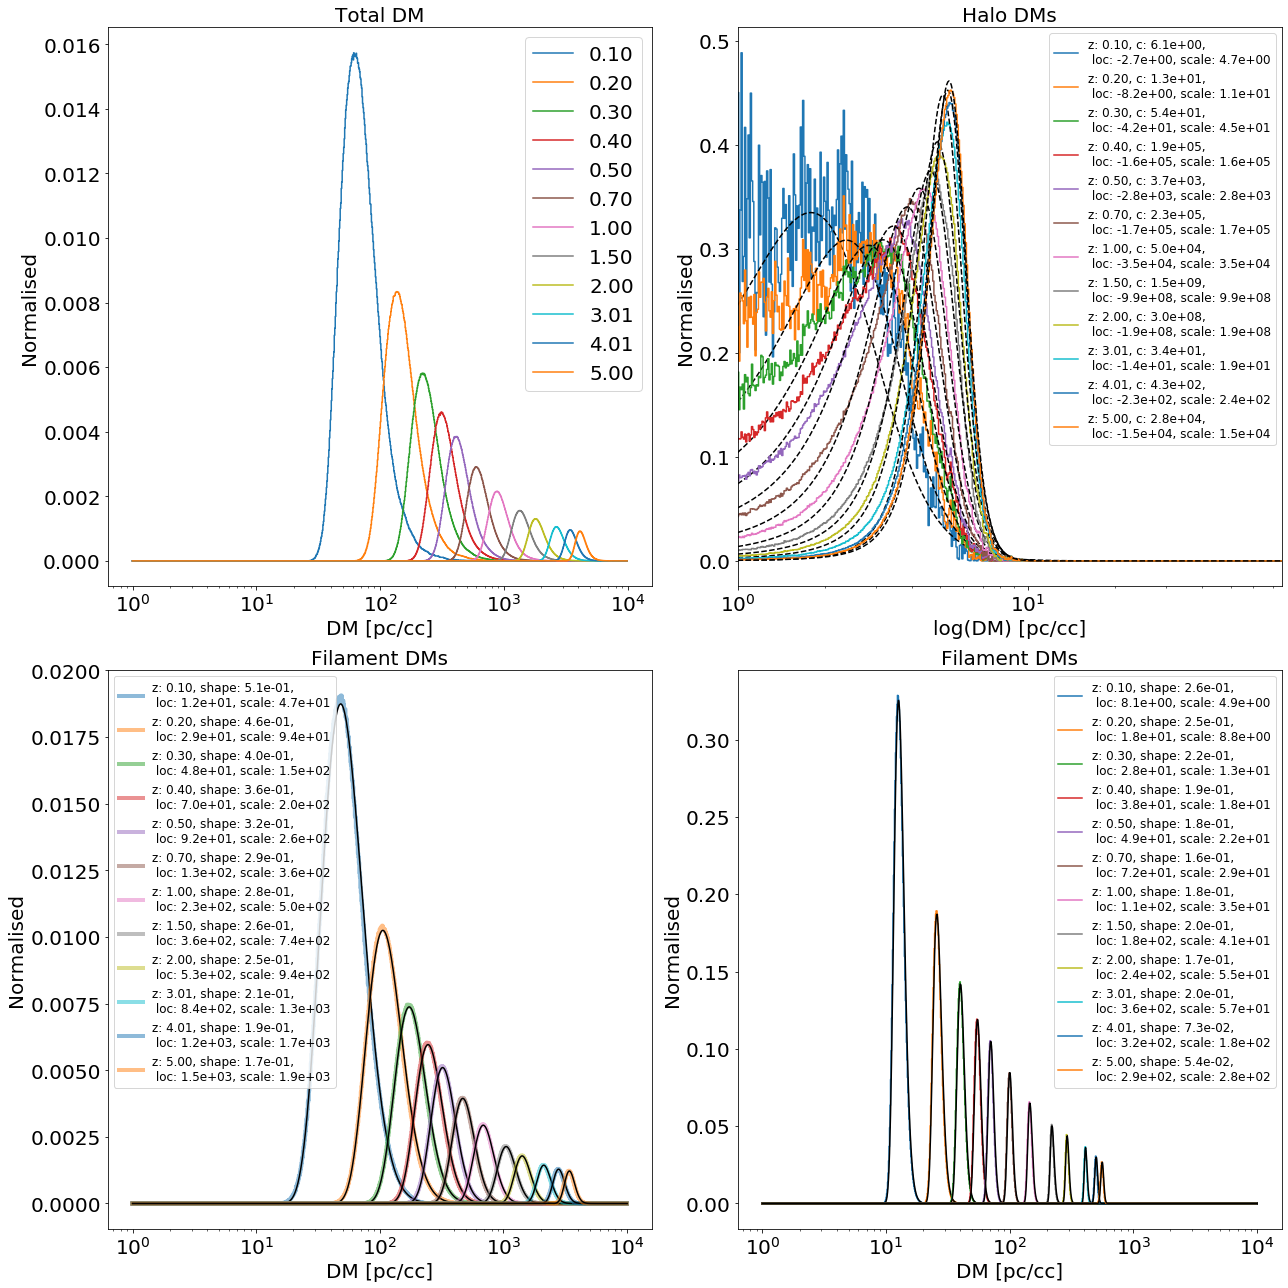

In [18]:
# print(Hal_cs,Hal_locs,Hal_scales)
print(len(Fil_shapes),len(Fil_locs),len(Fil_scales))
#p = lognorm.pdf(x=bin_edges,s=Fil_shapes[1],loc=Fil_locs[1],scale=Fil_scales[1])
#print(p)

#################
#initialise plot#
#################

fig = plt.figure(figsize=(18,18))

#first subplot: total DM
ax1 = fig.add_subplot(221)
ax1.set_title('Total DM',fontsize=20)
ax1.set_xlabel('DM [pc/cc]',fontsize=20)
ax1.set_ylabel('Normalised',fontsize=20)
ax1.set_xscale('log')
ax1.tick_params(axis='both',which='major',labelsize=20)

#second subplot: DM from halos
ax2 = fig.add_subplot(222)
ax2.set_title('Halo DMs',fontsize=20)
ax2.set_xlabel('log(DM) [pc/cc]',fontsize=20)
ax2.set_ylabel('Normalised',fontsize=20)
ax2.set_xscale('log')
ax2.set_xlim([1,75])
ax2.tick_params(axis='both',which='major',labelsize=20)

#third subplot: DM from filaments
ax3 = fig.add_subplot(223)
ax3.set_title('Filament DMs',fontsize=20)
ax3.set_xlabel('DM [pc/cc]',fontsize=20)
ax3.set_ylabel('Normalised',fontsize=20)
ax3.set_xscale('log')
ax3.tick_params(axis='both',which='major',labelsize=20)

#fourth subplot: DM from voids
ax4 = fig.add_subplot(224)
ax4.set_title('Filament DMs',fontsize=20)
ax4.set_xlabel('DM [pc/cc]',fontsize=20)
ax4.set_ylabel('Normalised',fontsize=20)
ax4.set_xscale('log')
ax4.tick_params(axis='both',which='major',labelsize=20)

#loop over histograms to plot (exclude first snapshot at redshift zero as we have no data for this)
for i in range(1,len(snap_z_list)):
    print('loop: {0}, redshift: {1:.2f}'.format(i,snap_z_list[i]))

    #plot the total DM
    ax1.step(x=bin_edges[:-1],y=Tot_DM_norm[i],label='{0:.2f}'.format(snap_z_list[i]))
    
    #plot the DM from halos (fisk method)

    Hal_fisk_c = Hal_fisk_cs[i-1]
    Hal_fisk_loc = Hal_fisk_locs[i-1]
    Hal_fisk_scale = Hal_fisk_scales[i-1]
    
    p_fisk = fisk.pdf(x=bin_edges,c=Hal_fisk_c,loc=Hal_fisk_loc,scale=Hal_fisk_scale) #fitted pdf
    ax2.step(x=Hal_DM_norm_new_bins[i][:-1],
             y=Hal_DM_norm_new_counts[i],
             label='z: {0:.2f}, c: {1:.1e},\n loc: {2:.1e}, scale: {3:.1e}'.format(snap_z_list[i],
                                                                                   Hal_fisk_c,
                                                                                   Hal_fisk_loc,
                                                                                   Hal_fisk_scale))
    ax2.plot(bin_edges,p_fisk,color='k',ls='--') #plot fit    
    

    
    #plot the DM from filaments
    
    Fil_shape = Fil_shapes[i-1]
    Fil_loc = Fil_locs[i-1]
    Fil_scale = Fil_scales[i-1]

    p = lognorm.pdf(x=bin_edges,s=Fil_shape,loc=Fil_loc,scale=Fil_scale) #fitted pdf
    
    ax3.step(x=bin_edges[:-1],
             y=Fil_DM_norm[i],
             lw=4,
             alpha=0.5,
             label='z: {0:.2f}, shape: {1:.1e},\n loc: {2:.1e}, scale: {3:.1e}'.format(snap_z_list[i],
                                                                                       Fil_shape,
                                                                                       Fil_loc,
                                                                                       Fil_scale)) #histogram
    ax3.plot(bin_edges,p,color='k') #plot fit
    
    #plot the DM from voids
    
    Voi_shape = Voi_shapes[i-1]
    Voi_loc = Voi_locs[i-1]
    Voi_scale = Voi_scales[i-1]
    
    p = lognorm.pdf(x=bin_edges,s=Voi_shape,loc=Voi_loc,scale=Voi_scale) #fitted pdf

    ax4.step(x=bin_edges[:-1],
             y=Voi_DM_norm[i],
             label='z: {0:.2f}, shape: {1:.1e},\n loc: {2:.1e}, scale: {3:.1e}'.format(snap_z_list[i],
                                                                                       Voi_shape,
                                                                                       Voi_loc,
                                                                                       Voi_scale))
    ax4.plot(bin_edges,p,color='k') #plot fit

ax1.legend(fontsize=20)
ax2.legend(fontsize=12)
ax3.legend(fontsize=12)
ax4.legend(fontsize=12)

plt.tight_layout()
plt.show()

## Draw from fits, compare to original data

1
2
3
4
5
6
7
8
9
10
11
12


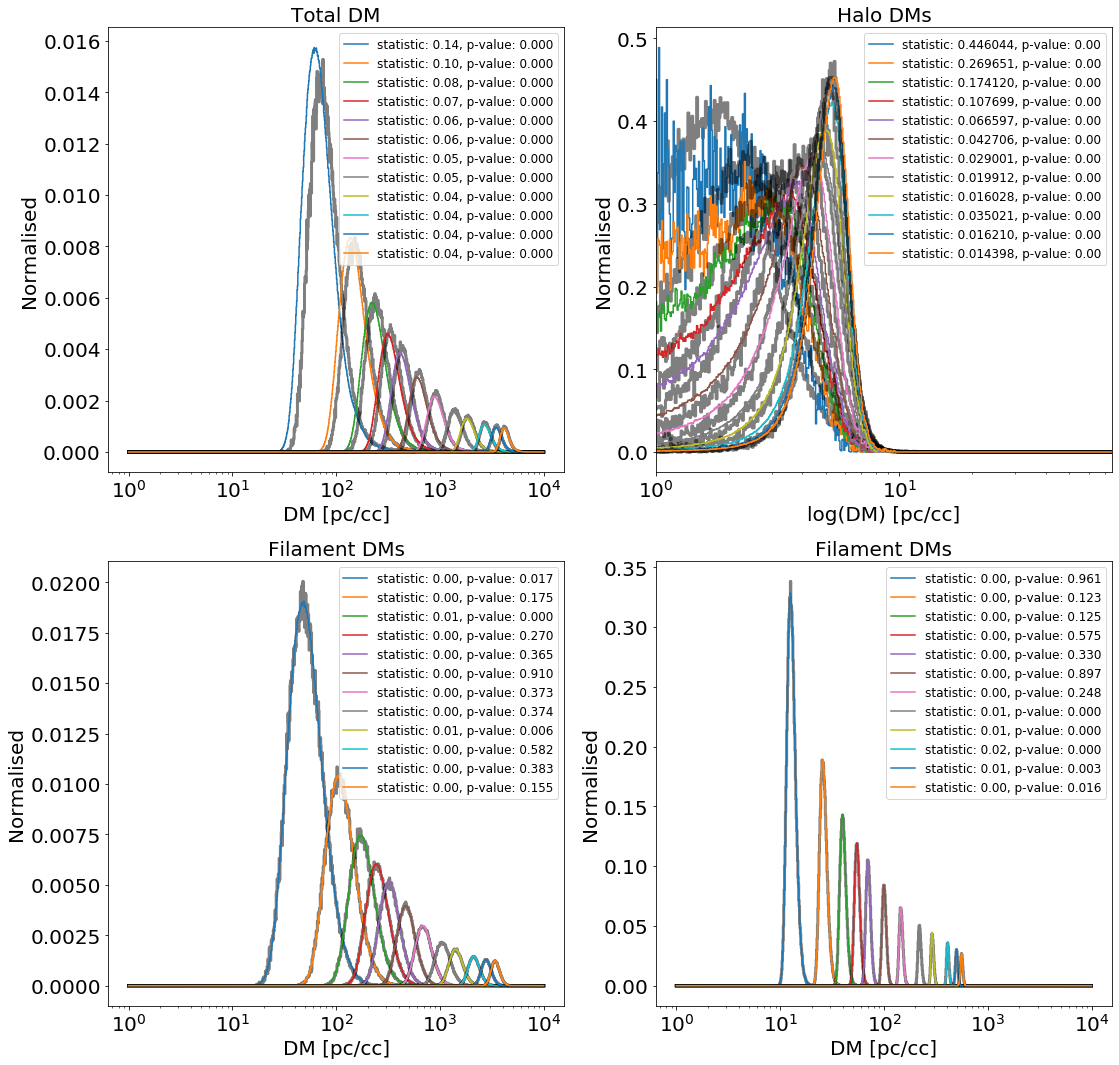

In [19]:
#################
#initialise plot#
#################

fig = plt.figure(figsize=(18,18))

#first subplot: total DM
ax1 = fig.add_subplot(221)
ax1.set_title('Total DM',fontsize=20)
ax1.set_xlabel('DM [pc/cc]',fontsize=20)
ax1.set_ylabel('Normalised',fontsize=20)
ax1.set_xscale('log')
ax1.tick_params(axis='both',which='major',labelsize=20)

#second subplot: DM from halos
ax2 = fig.add_subplot(222)
ax2.set_title('Halo DMs',fontsize=20)
ax2.set_xlabel('log(DM) [pc/cc]',fontsize=20)
ax2.set_ylabel('Normalised',fontsize=20)
ax2.set_xscale('log')
ax2.set_xlim([1,75])
ax2.tick_params(axis='both',which='major',labelsize=20)

#third subplot: DM from filaments
ax3 = fig.add_subplot(223)
ax3.set_title('Filament DMs',fontsize=20)
ax3.set_xlabel('DM [pc/cc]',fontsize=20)
ax3.set_ylabel('Normalised',fontsize=20)
ax3.set_xscale('log')
ax3.tick_params(axis='both',which='major',labelsize=20)

#fourth subplot: DM from voids
ax4 = fig.add_subplot(224)
ax4.set_title('Filament DMs',fontsize=20)
ax4.set_xlabel('DM [pc/cc]',fontsize=20)
ax4.set_ylabel('Normalised',fontsize=20)
ax4.set_xscale('log')
ax4.tick_params(axis='both',which='major',labelsize=20)

#loop over snapshots to plot (exclude first snapshot at redshift zero as we have no data for this)
for i in range(1,len(snap_z_list)):
    
    print(i)

    #####################
    #draw data from fits#
    #####################
    
    ndraws = 100000 #number of samples to draw
    
    Fil_draws = lognorm.rvs(size=ndraws,s=Fil_shapes[i-1],loc=Fil_locs[i-1],scale=Fil_scales[i-1]) #filament (lognormal)
    Voi_draws = lognorm.rvs(size=ndraws,s=Voi_shapes[i-1],loc=Voi_locs[i-1],scale=Voi_scales[i-1]) #void (lognormal)

    
    #Halo draw, fisk method
    #Note: for halo have to only draw positive values, but the function can go below zero.
    #Thus loop, throwing away negative draws until we reach the right number
    Hal_fisk_draws = []
    while len(Hal_fisk_draws)!=ndraws:
        draw = fisk.rvs(size=1,c=Hal_fisk_cs[i-1],loc=Hal_fisk_locs[i-1],scale=Hal_fisk_scales[i-1])[0]
        if draw>=0:
            Hal_fisk_draws.append(draw)
    Hal_fisk_draws = np.array(Hal_fisk_draws)
    
    
    #rename for ease
    Hal_draws = Hal_fisk_draws
    
    #####################################################
    #Combine to create total DM from combined structures#
    #####################################################
    #Note, as Halo portion was fitted to the log of the DMs, must take the exponent
    Tot_draws = Fil_draws+Voi_draws+np.exp(Hal_draws) #combine the halo, fil, and void portions
    
    #Compare the draws to the original data with a 2-samp ks test
    #note, must exp the halo draws
    Hal_stats, Hal_pval = ks_2samp(np.exp(Hal_draws),Hal_data[i])
    Fil_stats, Fil_pval = ks_2samp(Fil_draws,Fil_data[i])
    Voi_stats, Voi_pval = ks_2samp(Voi_draws,Voi_data[i])
    Tot_stats, Tot_pval = ks_2samp(Tot_draws,Tot_data[i])
                                
    #####################
    #histogram the draws#
    #####################
    
    Fil_draw_counts,Fil_draw_bins=np.histogram(Fil_draws,bins=bin_edges_new,density=True) #filament
    Voi_draw_counts,Voi_draw_bins=np.histogram(Voi_draws,bins=bin_edges_new,density=True) #void
    Hal_draw_counts,Hal_draw_bins=np.histogram(Hal_draws,bins=bin_edges_new,density=True) #halo
    Tot_draw_counts,Tot_draw_bins=np.histogram(Tot_draws,bins=bin_edges_new,density=True) #halo

    #rehistogram the originals too
    #Fil_orig_c,Fil_orig_b = np.histogram(Fil_data[i],bins=bin_edges_new,density=True)
    #Hal_orig_c,Hal_orig_b = np.histogram(Hal_data[i],bins=bin_edges_new,density=True)
    #Voi_orig_c,Voi_orig_b = np.histogram(Voi_data[i],bins=bin_edges_new,density=True)
    #Tot_orig_c,Tot_orig_b = np.histogram(Tot_data[i],bins=bin_edges_new,density=True)

    
    #################################
    #plot the histogram of the draws#
    #################################
    
    ax3.step(Fil_draw_bins[:-1],Fil_draw_counts,color='k',alpha=0.5,lw=3) #filament
    ax4.step(Voi_draw_bins[:-1],Voi_draw_counts,color='k',alpha=0.5,lw=3) #void
    ax2.step(Hal_draw_bins[:-1],Hal_draw_counts,color='k',alpha=0.5,lw=3) #halo
    ax1.step(Tot_draw_bins[:-1],Tot_draw_counts,color='k',alpha=0.5,lw=3) #total DM

    #replot the rehistogrammed originals too
    #ax3.step(Fil_orig_b[:-1],Fil_orig_c)
    #ax4.step(Voi_orig_b[:-1],Voi_orig_c)
    #ax2.step(Hal_orig_b[:-1],Hal_orig_c)
    #ax1.step(Tot_orig_b[:-1],Tot_orig_c)

    
    #########################################
    #plot the histogram of the original data#
    #########################################
    
    ax3.step(x=bin_edges[:-1],y=Fil_DM_norm[i],label='statistic: {0:.2f}, p-value: {1:.3f}'.format(Fil_stats,Fil_pval)) #filament
    ax4.step(x=bin_edges[:-1],y=Voi_DM_norm[i],label='statistic: {0:.2f}, p-value: {1:.3f}'.format(Voi_stats,Voi_pval)) #void
    ax2.step(x=Hal_DM_norm_new_bins[i][:-1],y=Hal_DM_norm_new_counts[i],label='statistic: {0:3f}, p-value: {1:.2f}'.format(Hal_stats,Hal_pval)) #halo
    ax1.step(x=bin_edges[:-1],y=Tot_DM_norm[i],label='statistic: {0:.2f}, p-value: {1:.3f}'.format(Tot_stats,Tot_pval)) #total DM

ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
ax3.legend(fontsize=12)
ax4.legend(fontsize=12)
    
plt.savefig('fits_new.png')





# Make posh fits

1
2
3
4
5
6
7
8
9
10
11
12


<Figure size 432x288 with 0 Axes>

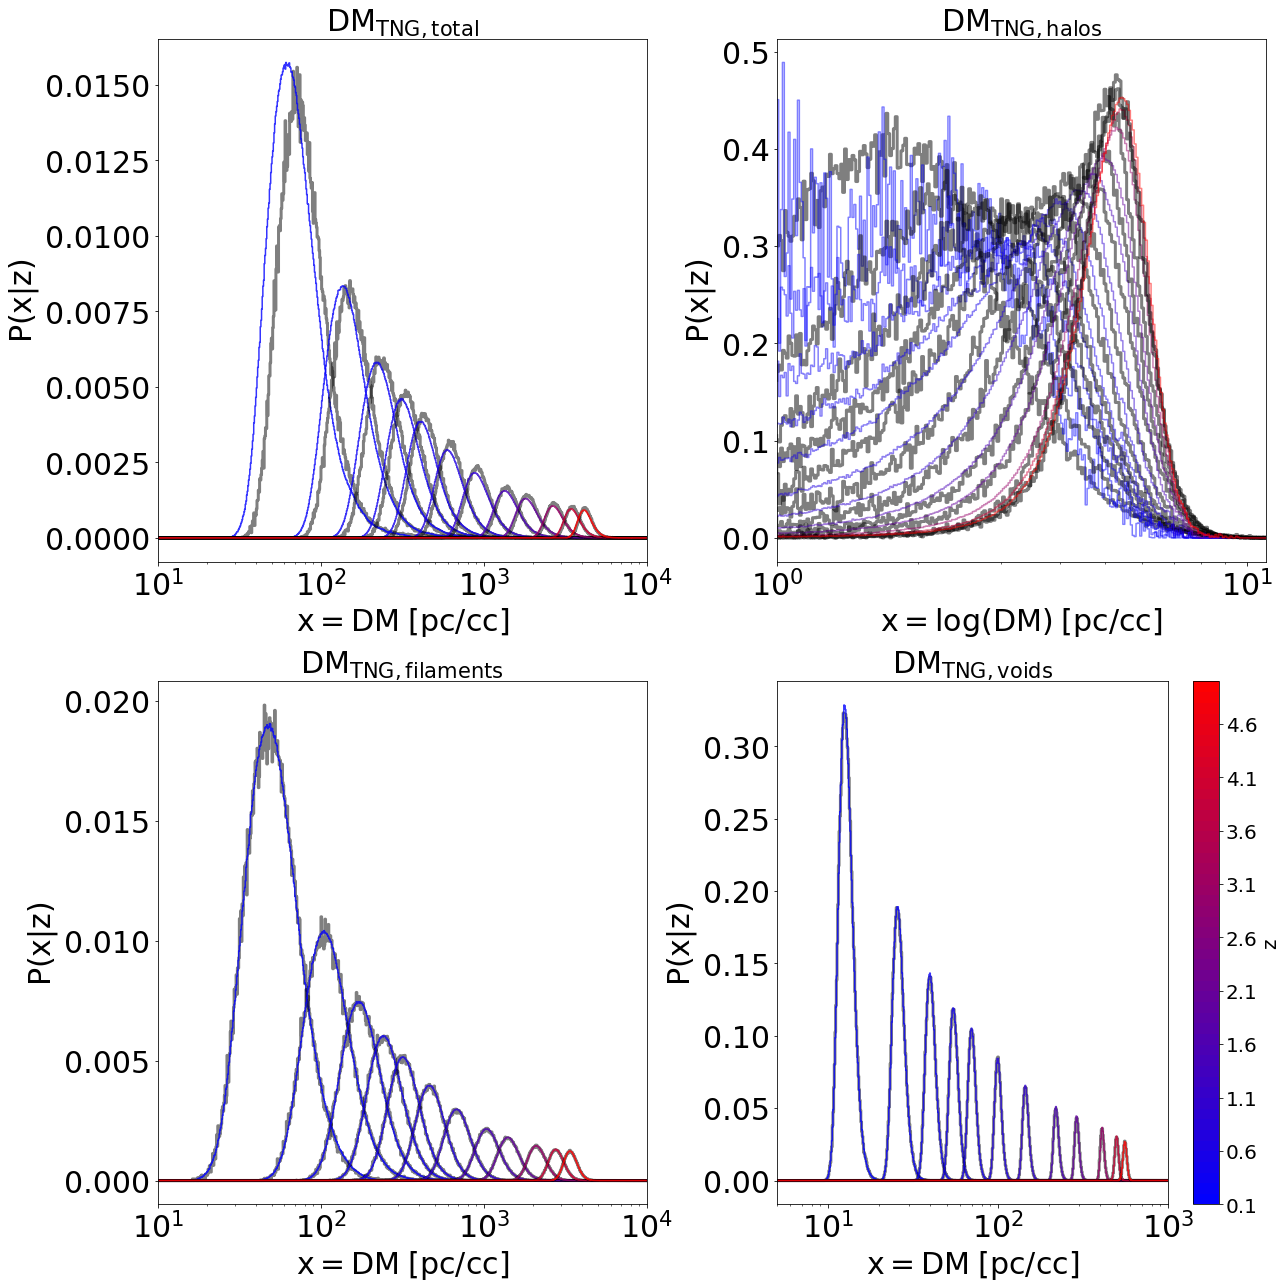

In [20]:
#########################
#colorbar initialisation#
#########################

#Note: from https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots

redshift_range = np.round(snap_z_list,1) #original range of redshifts rounded to nearest 1dp
redshift_range_new = np.array(redshift_range[1:]) #drop snap 99 (z=0) as we won't plot it
redshift_to_level = (redshift_range_new*10).astype(int) #levels which define colors must be integers
min_level = redshift_to_level[0] #color of min redshift
max_level = redshift_to_level[-1] #color of max redshift
step=1 #redshift step

#set up simple transition color map
mymap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['blue','red'])

#Create throwaway figure with contourf to provide colorbar info, then clear
Z = [[0,0],[0,0]]
levels = range(min_level,max_level+step,step)
CS3 = plt.contourf(Z, np.array(levels)/10, cmap=mymap) #note: divide by 10 here to get back to true redshifts
plt.clf()

#################
#initialise plot#
#################

fig = plt.figure(figsize=(18,18))

#first subplot: total DM
ax1 = fig.add_subplot(221)
ax1.set_title(r'$\rm{DM_{TNG,total}}$',fontsize=30)
ax1.set_xlabel(r'$\rm{x=DM\;[pc/cc]}$',fontsize=30)
ax1.set_ylabel(r'$\rm{P(x|z)}$',fontsize=30)
ax1.set_xscale('log')
ax1.set_xlim([10,10000])
ax1.tick_params(axis='both',which='major',labelsize=30)

#second subplot: DM from halos
ax2 = fig.add_subplot(222)
ax2.set_title(r'$\rm{DM_{TNG,halos}}$',fontsize=30)
ax2.set_xlabel(r'$\rm{x=log(DM)\;[pc/cc]}$',fontsize=30)
ax2.set_ylabel(r'$\rm{P(x|z)}$',fontsize=30)
ax2.set_xscale('log')
ax2.set_xlim([1,11])
ax2.tick_params(axis='both',which='major',labelsize=30)

#third subplot: DM from filaments
ax3 = fig.add_subplot(223)
ax3.set_title(r'$\rm{DM_{TNG,filaments}}$',fontsize=30)
ax3.set_xlabel(r'$\rm{x=DM\;[pc/cc]}$',fontsize=30)
ax3.set_ylabel(r'$\rm{P(x|z)}$',fontsize=30)
ax3.set_xscale('log')
ax3.set_xlim([10,10000])
ax3.tick_params(axis='both',which='major',labelsize=30)

#fourth subplot: DM from voids
ax4 = fig.add_subplot(224)
ax4.set_title(r'$\rm{DM_{TNG,voids}}$',fontsize=30)
ax4.set_xlabel(r'$\rm{x=DM\;[pc/cc]}$',fontsize=30)
ax4.set_ylabel(r'$\rm{P(x|z)}$',fontsize=30)
ax4.set_xscale('log')
ax4.set_xlim([5,1000])
ax4.tick_params(axis='both',which='major',labelsize=30)

#loop over snapshots to plot (exclude first snapshot at redshift zero as we have no data for this)
for i in range(1,len(snap_z_list)):
    
    print(i)

    #####################
    #draw data from fits#
    #####################
    
    ndraws = 100000 #number of samples to draw
    
    Fil_draws = lognorm.rvs(size=ndraws,s=Fil_shapes[i-1],loc=Fil_locs[i-1],scale=Fil_scales[i-1]) #filament (lognormal)
    Voi_draws = lognorm.rvs(size=ndraws,s=Voi_shapes[i-1],loc=Voi_locs[i-1],scale=Voi_scales[i-1]) #void (lognormal)

    
    #Halo draw, fisk method
    #Note: for halo have to only draw positive values, but the function can go below zero.
    #Thus loop, throwing away negative draws until we reach the right number
    Hal_fisk_draws = []
    while len(Hal_fisk_draws)!=ndraws:
        draw = fisk.rvs(size=1,c=Hal_fisk_cs[i-1],loc=Hal_fisk_locs[i-1],scale=Hal_fisk_scales[i-1])[0]
        if draw>=0:
            Hal_fisk_draws.append(draw)
    Hal_fisk_draws = np.array(Hal_fisk_draws)
    
    
    #rename for ease
    Hal_draws = Hal_fisk_draws
    
    #####################################################
    #Combine to create total DM from combined structures#
    #####################################################
    #Note, as Halo portion was fitted to the log of the DMs, must take the exponent
    Tot_draws = Fil_draws+Voi_draws+np.exp(Hal_draws) #combine the halo, fil, and void portions
    
    #Compare the draws to the original data with a 2-samp ks test
    #note, must exp the halo draws
    Hal_stats, Hal_pval = ks_2samp(np.exp(Hal_draws),Hal_data[i])
    Fil_stats, Fil_pval = ks_2samp(Fil_draws,Fil_data[i])
    Voi_stats, Voi_pval = ks_2samp(Voi_draws,Voi_data[i])
    Tot_stats, Tot_pval = ks_2samp(Tot_draws,Tot_data[i])
                                
    #####################
    #histogram the draws#
    #####################
    
    Fil_draw_counts,Fil_draw_bins=np.histogram(Fil_draws,bins=bin_edges_new,density=True) #filament
    Voi_draw_counts,Voi_draw_bins=np.histogram(Voi_draws,bins=bin_edges_new,density=True) #void
    Hal_draw_counts,Hal_draw_bins=np.histogram(Hal_draws,bins=bin_edges_new,density=True) #halo
    Tot_draw_counts,Tot_draw_bins=np.histogram(Tot_draws,bins=bin_edges_new,density=True) #halo
 
    ######################
    #do fancy plot things#
    ######################
    
    #set rgb color based on redshift normalised to my range
    r = ((np.round(snap_z_list[i],1)*10) - min_level)/(max_level-min_level)
    gr = 0
    b = 1-r
    
    #################################
    #plot the histogram of the draws#
    #################################
    
    ax3.step(Fil_draw_bins[:-1],Fil_draw_counts,color='k',alpha=0.5,lw=3) #filament
    ax4.step(Voi_draw_bins[:-1],Voi_draw_counts,color='k',alpha=0.5,lw=3) #void
    ax2.step(Hal_draw_bins[:-1],Hal_draw_counts,color='k',alpha=0.5,lw=3) #halo
    ax1.step(Tot_draw_bins[:-1],Tot_draw_counts,color='k',alpha=0.5,lw=3) #total DM

    #replot the rehistogrammed originals too
    #ax3.step(Fil_orig_b[:-1],Fil_orig_c)
    #ax4.step(Voi_orig_b[:-1],Voi_orig_c)
    #ax2.step(Hal_orig_b[:-1],Hal_orig_c)
    #ax1.step(Tot_orig_b[:-1],Tot_orig_c)

    
    #########################################
    #plot the histogram of the original data#
    #########################################
    
    ax3.step(x=bin_edges[:-1],
             y=Fil_DM_norm[i],
             color=(r,gr,b),
             alpha=0.8,
             label='shape: {0:.1e},\n loc: {1:.1e}, scale: {2:.1e}'.format(Fil_shape,
                                                                           Fil_loc,
                                                                           Fil_scale)) #filament
    
    ax4.step(x=bin_edges[:-1],
             y=Voi_DM_norm[i],
             color=(r,gr,b),
             alpha=0.8,
             label='shape: {0:.1e},\n loc: {1:.1e}, scale: {2:.1e}'.format(Voi_shape,
                                                                           Voi_loc,
                                                                           Voi_scale)) #void
    
    ax2.step(x=Hal_DM_norm_new_bins[i][:-1],
             y=Hal_DM_norm_new_counts[i],
             color=(r,gr,b),
             alpha=0.5,
             label='c: {0:.1e},\n loc: {1:.1e}, scale: {2:.1e}'.format(Hal_fisk_c,
                                                                       Hal_fisk_loc,
                                                                       Hal_fisk_scale)) #halo
    
    ax1.step(x=bin_edges[:-1],
             y=Tot_DM_norm[i],
             color=(r,gr,b),
             alpha=0.8,
             label='statistic: {0:.2f}, p-value: {1:.3f}'.format(Tot_stats,Tot_pval)) #total DM

#ax1.legend(fontsize=12)
#ax2.legend(fontsize=12)
#ax3.legend(fontsize=12)
#ax4.legend(fontsize=12)


#####################
#adjust the colorbar#
#####################

cbar = fig.colorbar(CS3) #add colorbar
for t in cbar.ax.get_yticklabels(): #change colorbar tick size
    t.set_fontsize(20)
cbar.set_label('z',fontsize=20) #change colorbar font size

plt.tight_layout()

plt.savefig('Paper_Plot_LSS_Fits.png')




# New version of the plot for paper

1
2
3
4
5
6
7
8
9
10
11
12


<Figure size 432x288 with 0 Axes>

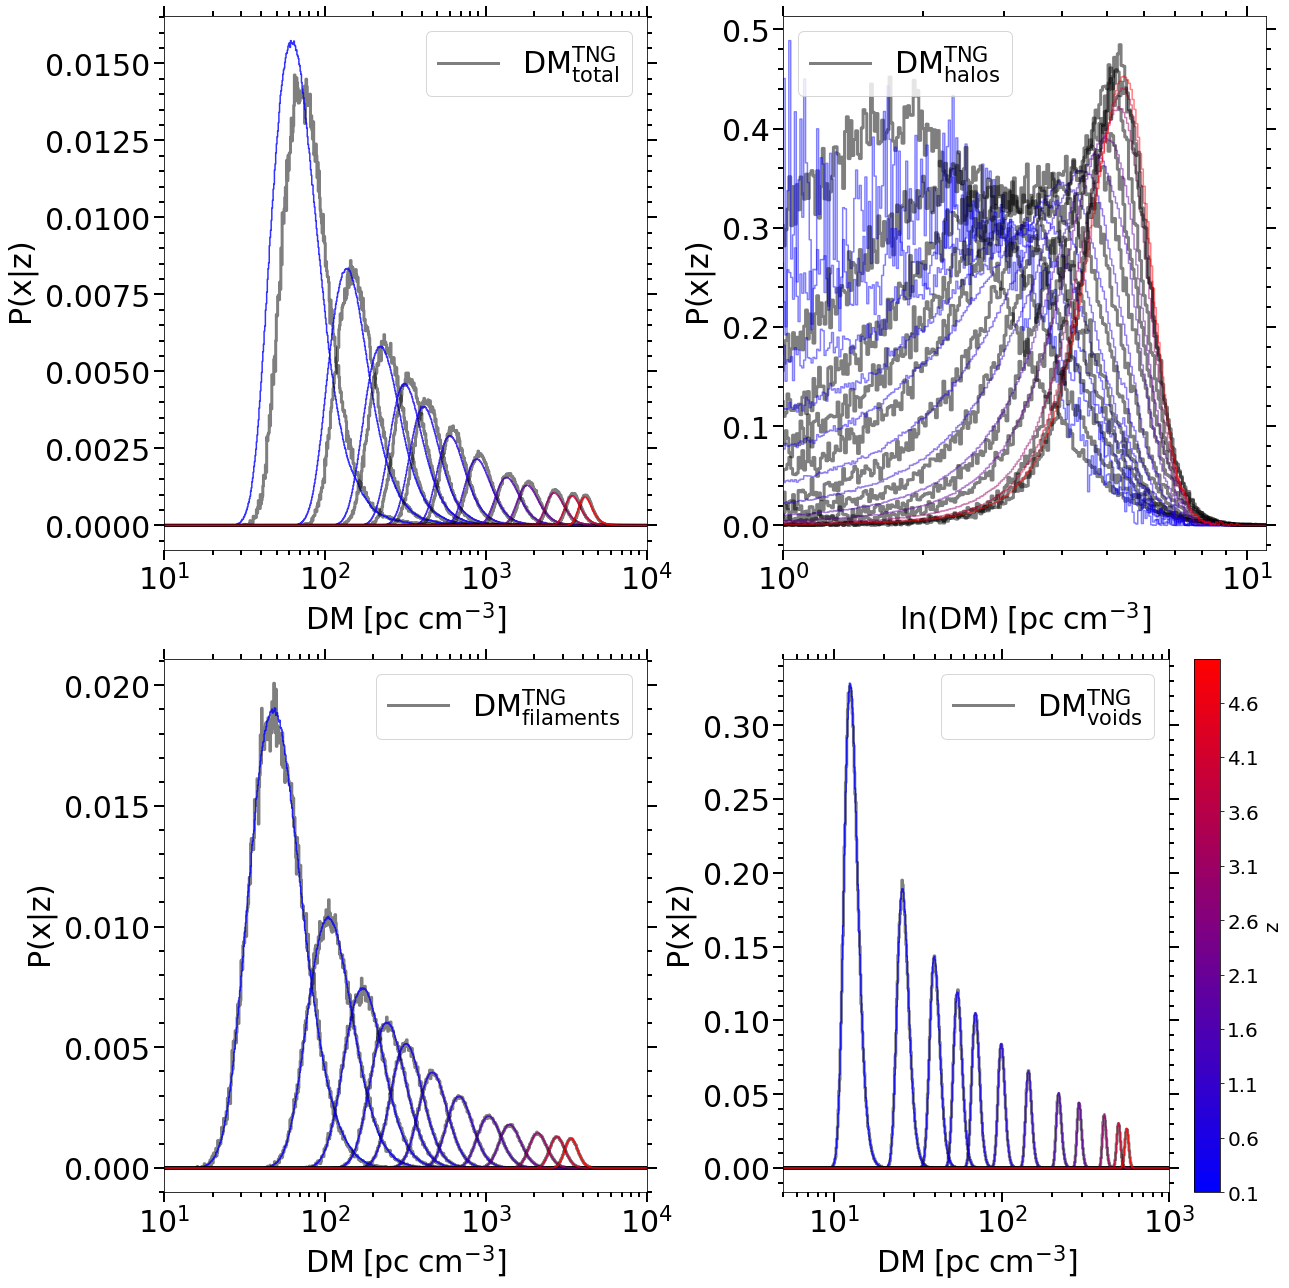

In [29]:
#########################
#colorbar initialisation#
#########################

#Note: from https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots

redshift_range = np.round(snap_z_list,1) #original range of redshifts rounded to nearest 1dp
redshift_range_new = np.array(redshift_range[1:]) #drop snap 99 (z=0) as we won't plot it
redshift_to_level = (redshift_range_new*10).astype(int) #levels which define colors must be integers
min_level = redshift_to_level[0] #color of min redshift
max_level = redshift_to_level[-1] #color of max redshift
step=1 #redshift step

#set up simple transition color map
mymap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['blue','red'])

#Create throwaway figure with contourf to provide colorbar info, then clear
Z = [[0,0],[0,0]]
levels = range(min_level,max_level+step,step)
CS3 = plt.contourf(Z, np.array(levels)/10, cmap=mymap) #note: divide by 10 here to get back to true redshifts
plt.clf()

#################
#initialise plot#
#################

fig = plt.figure(figsize=(18,18))

#first subplot: total DM
ax1 = fig.add_subplot(221)
#ax1.set_title(r'$\rm{DM_{TNG,total}}$',fontsize=30)
ax1.set_xlabel(r'$\rm{DM\;[pc\;cm^{-3}]}$',fontsize=30)
ax1.set_ylabel(r'$\rm{P(x|z)}$',fontsize=30)
ax1.set_xscale('log')
ax1.set_xlim([10,10000])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis='x', width=2, length=10, which='major',labelsize=30)
ax1.tick_params(axis='y', width=2, length=10, which='major',labelsize=30)
ax1.tick_params(axis='x', width=2, length=5, which='minor',labelsize=30)
ax1.tick_params(axis='y', width=2, length=5, which='minor',labelsize=30)
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()

#second subplot: DM from halos
ax2 = fig.add_subplot(222)
#ax2.set_title(r'$\rm{DM_{TNG,halos}}$',fontsize=30)
ax2.set_xlabel(r'$\rm{ln(DM)\;[pc\;cm^{-3}]}$',fontsize=30)
ax2.set_ylabel(r'$\rm{P(x|z)}$',fontsize=30)
ax2.set_xscale('log')
ax2.set_xlim([1,11])
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.tick_params(axis='x', width=2, length=10, which='major',labelsize=30)
ax2.tick_params(axis='y', width=2, length=10, which='major',labelsize=30)
ax2.tick_params(axis='x', width=2, length=5, which='minor',labelsize=30)
ax2.tick_params(axis='y', width=2, length=5, which='minor',labelsize=30)
ax2.xaxis.get_ticklocs(minor=True)
ax2.minorticks_on()

#third subplot: DM from filaments
ax3 = fig.add_subplot(223)
#ax3.set_title(r'$\rm{DM_{TNG,filaments}}$',fontsize=30)
ax3.set_xlabel(r'$\rm{DM\;[pc\;cm^{-3}]}$',fontsize=30)
ax3.set_ylabel(r'$\rm{P(x|z)}$',fontsize=30)
ax3.set_xscale('log')
ax3.set_xlim([10,10000])
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')
ax3.tick_params(axis='x', width=2, length=10, which='major',labelsize=30)
ax3.tick_params(axis='y', width=2, length=10, which='major',labelsize=30)
ax3.tick_params(axis='x', width=2, length=5, which='minor',labelsize=30)
ax3.tick_params(axis='y', width=2, length=5, which='minor',labelsize=30)
ax3.xaxis.get_ticklocs(minor=True)
ax3.minorticks_on()

#fourth subplot: DM from voids
ax4 = fig.add_subplot(224)
#ax4.set_title(r'$\rm{DM_{TNG,voids}}$',fontsize=30)
ax4.set_xlabel(r'$\rm{DM\;[pc\;cm^{-3}]}$',fontsize=30)
ax4.set_ylabel(r'$\rm{P(x|z)}$',fontsize=30)
ax4.set_xscale('log')
ax4.set_xlim([5,1000])
ax4.yaxis.set_ticks_position('both')
ax4.xaxis.set_ticks_position('both')
ax4.tick_params(axis='x', width=2, length=10, which='major',labelsize=30)
ax4.tick_params(axis='y', width=2, length=10, which='major',labelsize=30)
ax4.tick_params(axis='x', width=2, length=5, which='minor',labelsize=30)
ax4.tick_params(axis='y', width=2, length=5, which='minor',labelsize=30)
ax4.xaxis.get_ticklocs(minor=True)
ax4.minorticks_on()

#loop over snapshots to plot (exclude first snapshot at redshift zero as we have no data for this)
#also don't do every snapshot
for i in range(1,len(snap_z_list)):
    
    print(i)

    #####################
    #draw data from fits#
    #####################
    
    ndraws = 100000 #number of samples to draw
    
    Fil_draws = lognorm.rvs(size=ndraws,s=Fil_shapes[i-1],loc=Fil_locs[i-1],scale=Fil_scales[i-1]) #filament (lognormal)
    Voi_draws = lognorm.rvs(size=ndraws,s=Voi_shapes[i-1],loc=Voi_locs[i-1],scale=Voi_scales[i-1]) #void (lognormal)

    
    #Halo draw, fisk method
    #Note: for halo have to only draw positive values, but the function can go below zero.
    #Thus loop, throwing away negative draws until we reach the right number
    Hal_fisk_draws = []
    while len(Hal_fisk_draws)!=ndraws:
        draw = fisk.rvs(size=1,c=Hal_fisk_cs[i-1],loc=Hal_fisk_locs[i-1],scale=Hal_fisk_scales[i-1])[0]
        if draw>=0:
            Hal_fisk_draws.append(draw)
    Hal_fisk_draws = np.array(Hal_fisk_draws)
    
    
    #rename for ease
    Hal_draws = Hal_fisk_draws
    
    #####################################################
    #Combine to create total DM from combined structures#
    #####################################################
    #Note, as Halo portion was fitted to the log of the DMs, must take the exponent
    Tot_draws = Fil_draws+Voi_draws+np.exp(Hal_draws) #combine the halo, fil, and void portions
    
    #Compare the draws to the original data with a 2-samp ks test
    #note, must exp the halo draws
    Hal_stats, Hal_pval = ks_2samp(np.exp(Hal_draws),Hal_data[i])
    Fil_stats, Fil_pval = ks_2samp(Fil_draws,Fil_data[i])
    Voi_stats, Voi_pval = ks_2samp(Voi_draws,Voi_data[i])
    Tot_stats, Tot_pval = ks_2samp(Tot_draws,Tot_data[i])
                                
    #####################
    #histogram the draws#
    #####################
    
    Fil_draw_counts,Fil_draw_bins=np.histogram(Fil_draws,bins=bin_edges_new,density=True) #filament
    Voi_draw_counts,Voi_draw_bins=np.histogram(Voi_draws,bins=bin_edges_new,density=True) #void
    Hal_draw_counts,Hal_draw_bins=np.histogram(Hal_draws,bins=bin_edges_new,density=True) #halo
    Tot_draw_counts,Tot_draw_bins=np.histogram(Tot_draws,bins=bin_edges_new,density=True) #halo
 
    ######################
    #do fancy plot things#
    ######################
    
    #set rgb color based on redshift normalised to my range
    r = ((np.round(snap_z_list[i],1)*10) - min_level)/(max_level-min_level)
    gr = 0
    b = 1-r
    
    #################################
    #plot the histogram of the draws#
    #################################
    
    if i==1:#for first snap, plot with legend naming the lss
        ax3.step(Fil_draw_bins[:-1],Fil_draw_counts,color='k',alpha=0.5,lw=3,
                label=r'$\rm{DM^{TNG}_{filaments}}$') #filament
        ax3.legend(fontsize=30)
        ax4.step(Voi_draw_bins[:-1],Voi_draw_counts,color='k',alpha=0.5,lw=3,
                label=r'$\rm{DM^{TNG}_{voids}}$') #void
        ax4.legend(fontsize=30)
        ax2.step(Hal_draw_bins[:-1],Hal_draw_counts,color='k',alpha=0.5,lw=3,
                label=r'$\rm{DM^{TNG}_{halos}}$') #halo
        ax2.legend(fontsize=30)
        ax1.step(Tot_draw_bins[:-1],Tot_draw_counts,color='k',alpha=0.5,lw=3,
                label=r'$\rm{DM^{TNG}_{total}}$') #total DM
        ax1.legend(fontsize=30)
    else: #othereise no legend
        ax3.step(Fil_draw_bins[:-1],Fil_draw_counts,color='k',alpha=0.5,lw=3) #filament
        ax4.step(Voi_draw_bins[:-1],Voi_draw_counts,color='k',alpha=0.5,lw=3) #void
        ax2.step(Hal_draw_bins[:-1],Hal_draw_counts,color='k',alpha=0.5,lw=3) #halo
        ax1.step(Tot_draw_bins[:-1],Tot_draw_counts,color='k',alpha=0.5,lw=3) #total DM

    #replot the rehistogrammed originals too
    #ax3.step(Fil_orig_b[:-1],Fil_orig_c)
    #ax4.step(Voi_orig_b[:-1],Voi_orig_c)
    #ax2.step(Hal_orig_b[:-1],Hal_orig_c)
    #ax1.step(Tot_orig_b[:-1],Tot_orig_c)

    
    #########################################
    #plot the histogram of the original data#
    #########################################
    
    ax3.step(x=bin_edges[:-1],
             y=Fil_DM_norm[i],
             color=(r,gr,b),
             alpha=0.8,
             label='shape: {0:.1e},\n loc: {1:.1e}, scale: {2:.1e}'.format(Fil_shape,
                                                                           Fil_loc,
                                                                           Fil_scale)) #filament
    
    ax4.step(x=bin_edges[:-1],
             y=Voi_DM_norm[i],
             color=(r,gr,b),
             alpha=0.8,
             label='shape: {0:.1e},\n loc: {1:.1e}, scale: {2:.1e}'.format(Voi_shape,
                                                                           Voi_loc,
                                                                           Voi_scale)) #void
    
    ax2.step(x=Hal_DM_norm_new_bins[i][:-1],
             y=Hal_DM_norm_new_counts[i],
             color=(r,gr,b),
             alpha=0.5,
             label='c: {0:.1e},\n loc: {1:.1e}, scale: {2:.1e}'.format(Hal_fisk_c,
                                                                       Hal_fisk_loc,
                                                                       Hal_fisk_scale)) #halo
    
    ax1.step(x=bin_edges[:-1],
             y=Tot_DM_norm[i],
             color=(r,gr,b),
             alpha=0.8,
             label='statistic: {0:.2f}, p-value: {1:.3f}'.format(Tot_stats,Tot_pval)) #total DM

#ax1.legend(fontsize=12)
#ax2.legend(fontsize=12)
#ax3.legend(fontsize=12)
#ax4.legend(fontsize=12)


#####################
#adjust the colorbar#
#####################

cbar = fig.colorbar(CS3) #add colorbar
for t in cbar.ax.get_yticklabels(): #change colorbar tick size
    t.set_fontsize(20)
cbar.set_label('z',fontsize=20) #change colorbar font size

plt.tight_layout()

plt.savefig('Paper_Plot_LSS_Fits.png')




# Even newer version of plot for the paper

We will plot the redshifts: [0.0994018  0.29771768 0.70010635 1.49551217 3.00813107 4.00794511
 4.99593347]
Redshift: 2.220446049250313e-16
Redshift: 0.09940180263022191
True
Redshift: 0.19728418237600986
Redshift: 0.2977176845174465
True
Redshift: 0.3999269646135635
Redshift: 0.5030475232448832
Redshift: 0.7001063537185233
True
Redshift: 0.9972942257819404
Redshift: 1.4955121664955557
True
Redshift: 2.0020281392528516
Redshift: 3.008131071630377
True
Redshift: 4.0079451114652676
True
Redshift: 4.995933468164624
True
[0.0994018  0.29771768 0.70010635 1.49551217 3.00813107 4.00794511
 4.99593347]
[0.1, 0.3, 0.7, 1.5, 3.0, 4.0, 5.0]


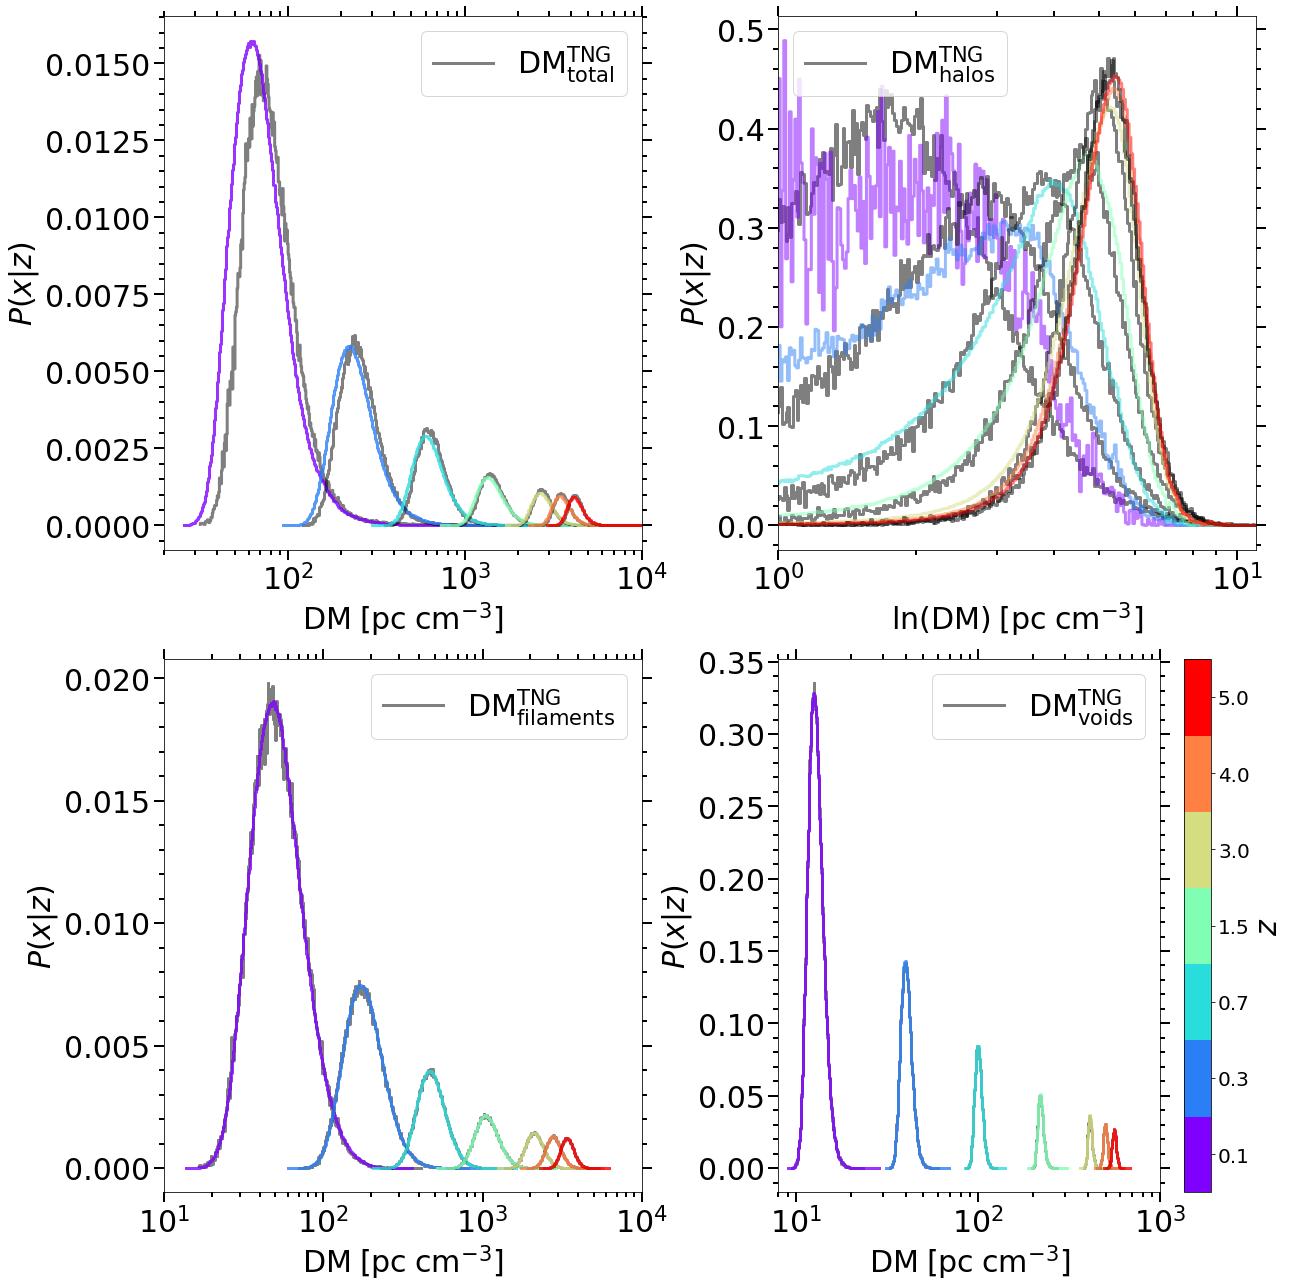

In [85]:
#########################
#colorbar initialisation#
#########################
#from https://stackoverflow.com/questions/48253810/show-a-discrete-colorbar-next-to-a-plot-as-a-legend-for-the-automatically-cho

import matplotlib.colors


toplot=[1,3,6,8,10,11,12]#,2,3,4,5,6,7,8,9,10,11,12] #the snapshots to plot

print('We will plot the redshifts: {0}'.format(snap_z_list[toplot]))

n = len(snap_z_list[toplot])

cmap = plt.get_cmap("rainbow",n)






#################
#initialise plot#
#################

fig = plt.figure(figsize=(18,18))

#first subplot: total DM
ax1 = fig.add_subplot(221)
#ax1.set_title(r'$\rm{DM_{TNG,total}}$',fontsize=30)
ax1.set_xlabel(r'$\rm{DM\;[pc\;cm^{-3}]}$',fontsize=30)
ax1.set_ylabel(r'$P(x|z)$',fontsize=30)
ax1.set_xscale('log')
ax1.set_xlim([20,10000])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis='x', width=2, length=10, which='major',labelsize=30)
ax1.tick_params(axis='y', width=2, length=10, which='major',labelsize=30)
ax1.tick_params(axis='x', width=2, length=5, which='minor',labelsize=30)
ax1.tick_params(axis='y', width=2, length=5, which='minor',labelsize=30)
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()

#second subplot: DM from halos
ax2 = fig.add_subplot(222)
#ax2.set_title(r'$\rm{DM_{TNG,halos}}$',fontsize=30)
ax2.set_xlabel(r'$\rm{ln(DM)\;[pc\;cm^{-3}]}$',fontsize=30)
ax2.set_ylabel(r'$P(x|z)$',fontsize=30)
ax2.set_xscale('log')
ax2.set_xlim([1,11])
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.tick_params(axis='x', width=2, length=10, which='major',labelsize=30)
ax2.tick_params(axis='y', width=2, length=10, which='major',labelsize=30)
ax2.tick_params(axis='x', width=2, length=5, which='minor',labelsize=30)
ax2.tick_params(axis='y', width=2, length=5, which='minor',labelsize=30)
ax2.xaxis.get_ticklocs(minor=True)
ax2.minorticks_on()

#third subplot: DM from filaments
ax3 = fig.add_subplot(223)
#ax3.set_title(r'$\rm{DM_{TNG,filaments}}$',fontsize=30)
ax3.set_xlabel(r'$\rm{DM\;[pc\;cm^{-3}]}$',fontsize=30)
ax3.set_ylabel(r'$P(x|z)$',fontsize=30)
ax3.set_xscale('log')
ax3.set_xlim([10,10000])
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')
ax3.tick_params(axis='x', width=2, length=10, which='major',labelsize=30)
ax3.tick_params(axis='y', width=2, length=10, which='major',labelsize=30)
ax3.tick_params(axis='x', width=2, length=5, which='minor',labelsize=30)
ax3.tick_params(axis='y', width=2, length=5, which='minor',labelsize=30)
ax3.xaxis.get_ticklocs(minor=True)
ax3.minorticks_on()

#fourth subplot: DM from voids
ax4 = fig.add_subplot(224)
#ax4.set_title(r'$\rm{DM_{TNG,voids}}$',fontsize=30)
ax4.set_xlabel(r'$\rm{DM\;[pc\;cm^{-3}]}$',fontsize=30)
ax4.set_ylabel(r'$P(x|z)$',fontsize=30)
ax4.set_xscale('log')
ax4.set_xlim([8,1000])
ax4.yaxis.set_ticks_position('both')
ax4.xaxis.set_ticks_position('both')
ax4.tick_params(axis='x', width=2, length=10, which='major',labelsize=30)
ax4.tick_params(axis='y', width=2, length=10, which='major',labelsize=30)
ax4.tick_params(axis='x', width=2, length=5, which='minor',labelsize=30)
ax4.tick_params(axis='y', width=2, length=5, which='minor',labelsize=30)
ax4.xaxis.get_ticklocs(minor=True)
ax4.minorticks_on()

#loop over snapshots to plot (exclude first snapshot at redshift zero as we have no data for this)
#also don't do every snapshot
plotcount = 0 #count to keep count of number plotted for colourbar updating

#for i in range(1,len(snap_z_list)):
for i in range(0,len(snap_z_list)):

    print('Redshift: {0}'.format(snap_z_list[i]))
    
    if i in toplot: #only plot some snaps
    #if count<3: #only plot every other snap

        print('True')


        #####################
        #draw data from fits#
        #####################

        ndraws = 100000 #number of samples to draw

        Fil_draws = lognorm.rvs(size=ndraws,s=Fil_shapes[i-1],loc=Fil_locs[i-1],scale=Fil_scales[i-1]) #filament (lognormal)
        Voi_draws = lognorm.rvs(size=ndraws,s=Voi_shapes[i-1],loc=Voi_locs[i-1],scale=Voi_scales[i-1]) #void (lognormal)


        #Halo draw, fisk method
        #Note: for halo have to only draw positive values, but the function can go below zero.
        #Thus loop, throwing away negative draws until we reach the right number
        Hal_fisk_draws = []
        while len(Hal_fisk_draws)!=ndraws:
            draw = fisk.rvs(size=1,c=Hal_fisk_cs[i-1],loc=Hal_fisk_locs[i-1],scale=Hal_fisk_scales[i-1])[0]
            if draw>=0:
                Hal_fisk_draws.append(draw)
        Hal_fisk_draws = np.array(Hal_fisk_draws)


        #rename for ease
        Hal_draws = Hal_fisk_draws

        #####################################################
        #Combine to create total DM from combined structures#
        #####################################################
        #Note, as Halo portion was fitted to the log of the DMs, must take the exponent
        Tot_draws = Fil_draws+Voi_draws+np.exp(Hal_draws) #combine the halo, fil, and void portions

        #Compare the draws to the original data with a 2-samp ks test
        #note, must exp the halo draws
        Hal_stats, Hal_pval = ks_2samp(np.exp(Hal_draws),Hal_data[i])
        Fil_stats, Fil_pval = ks_2samp(Fil_draws,Fil_data[i])
        Voi_stats, Voi_pval = ks_2samp(Voi_draws,Voi_data[i])
        Tot_stats, Tot_pval = ks_2samp(Tot_draws,Tot_data[i])

        #####################
        #histogram the draws#
        #####################

        Fil_draw_counts,Fil_draw_bins=np.histogram(Fil_draws,bins=bin_edges_new,density=True) #filament
        Voi_draw_counts,Voi_draw_bins=np.histogram(Voi_draws,bins=bin_edges_new,density=True) #void
        Hal_draw_counts,Hal_draw_bins=np.histogram(Hal_draws,bins=bin_edges_new,density=True) #halo
        Tot_draw_counts,Tot_draw_bins=np.histogram(Tot_draws,bins=bin_edges_new,density=True) #halo

        ######################
        #do fancy plot things#
        ######################

        #set rgb color based on redshift normalised to my range
        r = ((np.round(snap_z_list[i],1)*10) - min_level)/(max_level-min_level)
        gr = 0
        b = 1-r

        #################################
        #plot the histogram of the draws#
        #################################

        if i==1:#for first snap, plot with legend naming the lss
            
            #get where the curves are not zero 
            #so we don't plot superfluous bits of the lines
            filmask = np.where(Fil_draw_counts!=0)
            halmask = np.where(Hal_draw_counts!=0)
            voimask = np.where(Voi_draw_counts!=0)
            totmask = np.where(Tot_draw_counts!=0)
            
            ax3.step(Fil_draw_bins[:-1][filmask],
                     Fil_draw_counts[filmask],
                     color='k',alpha=0.5,lw=3,
                    label=r'$\rm{DM^{TNG}_{filaments}}$') #filament
            ax3.legend(fontsize=30)
            
            ax4.step(Voi_draw_bins[:-1][voimask],
                     Voi_draw_counts[voimask],
                     color='k',alpha=0.5,lw=3,
                    label=r'$\rm{DM^{TNG}_{voids}}$') #void
            ax4.legend(fontsize=30)
            
            ax2.step(Hal_draw_bins[:-1][halmask],
                     Hal_draw_counts[halmask],
                     color='k',alpha=0.5,lw=3,
                    label=r'$\rm{DM^{TNG}_{halos}}$') #halo
            ax2.legend(fontsize=30)
            
            ax1.step(Tot_draw_bins[:-1][totmask],
                     Tot_draw_counts[totmask],
                     color='k',alpha=0.5,lw=3,
                    label=r'$\rm{DM^{TNG}_{total}}$') #total DM
            ax1.legend(fontsize=30)
            
        else: #otherwise no legend
            
            #get where the curves are not zero 
            #so we don't plot superfluous bits of the lines
            filmask = np.where(Fil_draw_counts!=0)
            halmask = np.where(Hal_draw_counts!=0)
            voimask = np.where(Voi_draw_counts!=0)
            totmask = np.where(Tot_draw_counts!=0)
            
            ax3.step(Fil_draw_bins[:-1][filmask],
                     Fil_draw_counts[filmask],
                     color='k',alpha=0.5,lw=3) #filament
            
            ax4.step(Voi_draw_bins[:-1][voimask],
                     Voi_draw_counts[voimask],
                     color='k',alpha=0.5,lw=3) #void
            
            ax2.step(Hal_draw_bins[:-1][halmask],
                     Hal_draw_counts[halmask],
                     color='k',alpha=0.5,lw=3) #halo
            
            ax1.step(Tot_draw_bins[:-1][totmask],
                     Tot_draw_counts[totmask],
                     color='k',alpha=0.5,lw=3) #total DM
            

        #replot the rehistogrammed originals too
        #ax3.step(Fil_orig_b[:-1],Fil_orig_c)
        #ax4.step(Voi_orig_b[:-1],Voi_orig_c)
        #ax2.step(Hal_orig_b[:-1],Hal_orig_c)
        #ax1.step(Tot_orig_b[:-1],Tot_orig_c)


        #########################################
        #plot the histogram of the original data#
        #########################################
        
        #get where the curves are not zero so we 
        #don't plot superfluous bits of the lines
        
        filmask = np.where(Fil_DM_norm[i]!=0)
        halmask = np.where(Hal_DM_norm[i]!=0)
        voimask = np.where(Voi_DM_norm[i]!=0)
        totmask = np.where(Tot_DM_norm[i]!=0)


        ax3.step(x=bin_edges[:-1][filmask],
                 y=Fil_DM_norm[i][filmask],
                 color=cmap(plotcount),
                 alpha=0.8,
                 lw=3,
                 label='shape: {0:.1e},\n loc: {1:.1e}, scale: {2:.1e}'.format(Fil_shape,
                                                                               Fil_loc,
                                                                               Fil_scale)) #filament

        ax4.step(x=bin_edges[:-1][voimask],
                 y=Voi_DM_norm[i][voimask],
                 color=cmap(plotcount),
                 alpha=0.8,
                 lw=3,
                 label='shape: {0:.1e},\n loc: {1:.1e}, scale: {2:.1e}'.format(Voi_shape,
                                                                               Voi_loc,
                                                                               Voi_scale)) #void

        ax2.step(x=Hal_DM_norm_new_bins[i][:-1][halmask],
                 y=Hal_DM_norm_new_counts[i][halmask],
                 color=cmap(plotcount),
                 alpha=0.5,
                 lw=3,
                 label='c: {0:.1e},\n loc: {1:.1e}, scale: {2:.1e}'.format(Hal_fisk_c,
                                                                           Hal_fisk_loc,
                                                                           Hal_fisk_scale)) #halo

        ax1.step(x=bin_edges[:-1][totmask],
                 y=Tot_DM_norm[i][totmask],
                 color=cmap(plotcount),
                 alpha=0.8,
                 lw=3,
                 label='statistic: {0:.2f}, p-value: {1:.3f}'.format(Tot_stats,Tot_pval)) #total DM

        #increment colour bar count
        plotcount+=1


#ax1.legend(fontsize=12)
#ax2.legend(fontsize=12)
#ax3.legend(fontsize=12)
#ax4.legend(fontsize=12)


#####################
#adjust the colorbar#
#####################

#get tick labels in shorter format

print(snap_z_list[toplot])
print([float('{0:.1f}'.format(i)) for i in snap_z_list[toplot]])
ticklabels = [float('{0:.1f}'.format(i)) for i in snap_z_list[toplot]]


norm= matplotlib.colors.BoundaryNorm(np.arange(0,n+1)-0.5, n)
#norm= matplotlib.colors.BoundaryNorm([0,1,2], n)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar=fig.colorbar(sm, ticks=ticklabels)


#cbar = plt.colorbar(sm, ticks=ticklabels, format=mpl.ticker.ScalarFormatter(), 
#                    shrink=1.0, fraction=0.1, pad=0)

cbar.set_ticks(np.arange(n))
cbar.set_ticklabels(ticklabels)

#ticklabels=snap_z_list[toplot]

#norm= matplotlib.colors.BoundaryNorm(np.arange(0,n+1)-0.5, n)
#norm= matplotlib.colors.BoundaryNorm([0,1,2], n)
#
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])
#cbar=fig.colorbar(sm, ticks=ticklabels)
##plt.show()
#
##cbar = fig.colorbar(CS3) #add colorbar
for t in cbar.ax.get_yticklabels(): #change colorbar tick size
    t.set_fontsize(20)
cbar.set_label(r'$z$',fontsize=30) #change colorbar font size

plt.tight_layout()

plt.savefig('Paper_Plot_LSS_Fits_2.png')



# Print results for paper table

In [71]:
print(len(snap_z_list),snap_z_list)
print(len(Fil_shapes),len(Fil_locs),len(Fil_scales))
print(len(Voi_shapes),len(Voi_locs),len(Voi_scales))
print(len(Hal_fisk_cs),len(Hal_fisk_locs),len(Hal_fisk_scales))
print('---')
for i in (list(zip(snap_z_list[1:],
                   Hal_fisk_cs,Hal_fisk_locs,Hal_fisk_scales,
                   Fil_shapes,Fil_locs,Fil_scales,
                   Voi_shapes,Voi_locs,Voi_scales))):
    print('{0:.2f} & {1:.2f} & {2:.2f} & {3:.2f} & {4:.2f} & {5:.2f} & {6:.2f} & {7:.2f} & {8:.2f} & {9:.2f}'.format(i[0],
                                                                                   i[1],i[2],i[3],
                                                                                   i[4],i[5],i[6],
                                                                                   i[7],i[8],i[9]))

13 [2.22044605e-16 9.94018026e-02 1.97284182e-01 2.97717685e-01
 3.99926965e-01 5.03047523e-01 7.00106354e-01 9.97294226e-01
 1.49551217e+00 2.00202814e+00 3.00813107e+00 4.00794511e+00
 4.99593347e+00]
12 12 12
12 12 12
12 12 12
---
0.10 & 6.12 & -2.66 & 4.69 & 0.51 & 11.76 & 47.38 & 0.26 & 8.07 & 4.89
0.20 & 13.15 & -8.22 & 10.72 & 0.46 & 29.34 & 94.33 & 0.25 & 17.59 & 8.76
0.30 & 54.14 & -41.75 & 44.62 & 0.40 & 47.94 & 146.43 & 0.22 & 27.51 & 13.16
0.40 & 191544.89 & -155041.91 & 155045.08 & 0.36 & 69.50 & 199.68 & 0.19 & 38.03 & 17.64
0.50 & 3651.94 & -2831.64 & 2835.08 & 0.32 & 91.92 & 255.21 & 0.18 & 49.10 & 22.03
0.70 & 226562.57 & -166369.30 & 166373.14 & 0.29 & 133.98 & 364.03 & 0.16 & 71.72 & 29.46
1.00 & 50183.27 & -34989.94 & 34994.16 & 0.28 & 225.75 & 498.55 & 0.18 & 112.03 & 34.93
1.50 & 1477835648.19 & -985206268.55 & 985206273.17 & 0.26 & 362.44 & 736.74 & 0.20 & 181.42 & 40.61
2.00 & 301737876.50 & -187118519.72 & 187118524.61 & 0.25 & 532.32 & 937.79 & 0.17 & 238.47 &